In [75]:
import pandas as pd
import numpy as np
import os
import sys
import argparse
import logging
import json
import geopandas as gpd
import shapely
import shapely.geometry
import shapely.ops
import shapely.wkt
import shapely.affinity
import pyproj
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as ps
import plotly.colors as pc
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime

In [4]:
terremotos = pd.read_csv(r'C:\Users\satin\OneDrive\Documentos\GitHub\TERREMOTOS\all_month 1.csv')

In [5]:
pd.read_csv(r'C:\Users\satin\OneDrive\Documentos\GitHub\TERREMOTOS\all_month 1.csv')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.690000,0.89,ml,33.0,116.0,NaN,0.20,...,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.310000,1.310000,0.167000,28.0,automatic,ci,ci
1,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.340000,0.82,ml,5.0,168.0,0.13960,0.15,...,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.870000,10.420000,0.388000,9.0,automatic,ci,ci
2,2025-05-02T02:36:43.010Z,59.731200,-151.989200,58.700000,1.90,ml,NaN,NaN,NaN,0.98,...,2025-05-02T02:38:45.940Z,"10 km WSW of Anchor Point, Alaska",earthquake,NaN,0.900000,NaN,NaN,automatic,ak,ak
3,2025-05-02T02:33:57.040Z,33.815500,-116.828833,29.800000,1.17,ml,15.0,208.0,0.18570,0.17,...,2025-05-02T02:37:27.431Z,"10 km NE of Valle Vista, CA",earthquake,1.570000,0.910000,0.307000,33.0,automatic,ci,ci
4,2025-05-02T02:32:14.770Z,19.569666,-155.366669,60.099998,2.63,ml,8.0,149.0,0.09350,0.32,...,2025-05-02T02:35:58.840Z,"19 km NW of Volcano, Hawaii",earthquake,2.980000,4.890000,0.730000,4.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10132,2025-04-02T03:39:39.270Z,51.926833,179.552667,6.870000,1.57,ml,6.0,148.0,0.02751,0.26,...,2025-04-03T16:46:20.120Z,"262 km W of Adak, Alaska",earthquake,0.880000,1.410000,0.188070,6.0,reviewed,av,av
10133,2025-04-02T03:38:09.956Z,29.001000,-98.015000,5.737300,2.10,ml,23.0,81.0,0.00000,0.20,...,2025-04-02T13:40:50.040Z,"2 km N of Falls City, Texas",earthquake,1.343649,1.803561,0.100000,23.0,reviewed,tx,tx
10134,2025-04-02T03:13:45.209Z,61.291500,-147.753400,17.500000,2.00,ml,NaN,NaN,NaN,0.66,...,2025-04-23T20:17:31.699Z,"57 km S of Glacier View, Alaska",earthquake,NaN,0.100000,NaN,NaN,reviewed,ak,ak
10135,2025-04-02T03:06:07.531Z,55.335200,-160.375100,5.964000,2.80,ml,26.0,207.0,0.06000,0.63,...,2025-04-23T21:48:43.040Z,"7 km E of Sand Point, Alaska",earthquake,3.470000,9.077000,0.081000,20.0,reviewed,us,us


In [6]:
pd.set_option('display.max_columns', None)

In [8]:
terremotos.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10137.000000,10137.000000,10137.000000,10137.000000,8661.000000,8661.000000,8659.000000,10137.000000,8046.000000,10137.000000,8644.000000,8660.000000
mean,38.731782,-106.940775,20.288255,1.519695,23.452719,111.266649,0.434701,0.258716,1.706322,2.186346,0.177142,19.206928
std,17.984444,73.009765,50.234703,1.279802,22.620950,64.132831,1.579085,0.271471,3.264264,5.142015,0.103722,33.116053
min,-65.172700,-179.930800,-3.410000,-1.320000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.531000,-146.793600,3.000000,0.720000,9.000000,64.000000,0.014770,0.080000,0.250000,0.450000,0.110000,7.000000
50%,38.811165,-121.076667,7.400000,1.260000,17.000000,94.000000,0.052140,0.160000,0.416988,0.720000,0.160000,12.000000
75%,51.276000,-115.607667,13.800000,1.970000,29.000000,146.000000,0.117050,0.330000,0.950000,1.643410,0.219056,22.000000
max,86.322700,179.999300,642.872000,6.900000,400.000000,359.000000,42.272000,3.830000,41.690000,68.600000,2.090000,802.000000


In [9]:
terremotos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.690000,0.89,ml,33.0,116.0,NaN,0.20,ci,ci41142560,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.31,1.31,0.167,28.0,automatic,ci,ci
1,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.340000,0.82,ml,5.0,168.0,0.1396,0.15,ci,ci41142544,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.87,10.42,0.388,9.0,automatic,ci,ci
2,2025-05-02T02:36:43.010Z,59.731200,-151.989200,58.700000,1.90,ml,NaN,NaN,NaN,0.98,ak,ak0255lsz0jx,2025-05-02T02:38:45.940Z,"10 km WSW of Anchor Point, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak
3,2025-05-02T02:33:57.040Z,33.815500,-116.828833,29.800000,1.17,ml,15.0,208.0,0.1857,0.17,ci,ci41142528,2025-05-02T02:37:27.431Z,"10 km NE of Valle Vista, CA",earthquake,1.57,0.91,0.307,33.0,automatic,ci,ci
4,2025-05-02T02:32:14.770Z,19.569666,-155.366669,60.099998,2.63,ml,8.0,149.0,0.0935,0.32,hv,hv74664242,2025-05-02T02:35:58.840Z,"19 km NW of Volcano, Hawaii",earthquake,2.98,4.89,0.730,4.0,automatic,hv,hv


In [10]:
terremotos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10137 non-null  object 
 1   latitude         10137 non-null  float64
 2   longitude        10137 non-null  float64
 3   depth            10137 non-null  float64
 4   mag              10137 non-null  float64
 5   magType          10137 non-null  object 
 6   nst              8661 non-null   float64
 7   gap              8661 non-null   float64
 8   dmin             8659 non-null   float64
 9   rms              10137 non-null  float64
 10  net              10137 non-null  object 
 11  id               10137 non-null  object 
 12  updated          10137 non-null  object 
 13  place            10137 non-null  object 
 14  type             10137 non-null  object 
 15  horizontalError  8046 non-null   float64
 16  depthError       10137 non-null  float64
 17  magError    

In [12]:
terremotos.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [14]:
terremotos.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1476
gap                1476
dmin               1478
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2091
depthError            0
magError           1493
magNst             1477
status                0
locationSource        0
magSource             0
dtype: int64

In [16]:
terremotos.duplicated().sum()

np.int64(0)

In [17]:
# Ver cuántas filas tiene el dataframe
print("Filas y columnas:", terremotos.shape)

# Rellenar nulos con valores adecuados
terremotos['nst'].fillna(0, inplace=True)
terremotos['gap'].fillna(terremotos['gap'].median(), inplace=True)
terremotos['dmin'].fillna(terremotos['dmin'].median(), inplace=True)
terremotos['magError'].fillna(terremotos['magError'].mean(), inplace=True)

# Eliminar columnas con muchos nulos si no se usarán
terremotos.drop(columns=['horizontalError', 'magNst'], inplace=True)

# Verificar que no quedan nulos importantes
print("Nulos después del preprocesamiento:")
print(terremotos.isna().sum())


Filas y columnas: (10137, 22)
Nulos después del preprocesamiento:
time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
nst               0
gap               0
dmin              0
rms               0
net               0
id                0
updated           0
place             0
type              0
depthError        0
magError          0
status            0
locationSource    0
magSource         0
dtype: int64


C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1772082025.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  terremotos['nst'].fillna(0, inplace=True)
C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1772082025.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [18]:
# Eliminar filas que tienen más de 5 valores nulos
# (es decir, conservar solo filas con al menos 15 valores válidos)
terremotos.dropna(thresh=15, inplace=True)

# Ver cuántas filas quedan
print("Filas después de limpiar:", terremotos.shape[0])

Filas después de limpiar: 10137


In [19]:
# Reindexar el DataFrame usando la columna 'id'
terremotos.set_index('id', inplace=True)

# Mostrar las primeras filas para verificar
terremotos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,depthError,magError,status,locationSource,magSource
id,,,,,,,,,,,,,,,,,,,
ci41142560,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.690000,0.89,ml,33.0,116.0,0.05214,0.20,ci,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,1.31,0.167000,automatic,ci,ci
ci41142544,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.340000,0.82,ml,5.0,168.0,0.13960,0.15,ci,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,10.42,0.388000,automatic,ci,ci
ak0255lsz0jx,2025-05-02T02:36:43.010Z,59.731200,-151.989200,58.700000,1.90,ml,0.0,94.0,0.05214,0.98,ak,2025-05-02T02:38:45.940Z,"10 km WSW of Anchor Point, Alaska",earthquake,0.90,0.177142,automatic,ak,ak
ci41142528,2025-05-02T02:33:57.040Z,33.815500,-116.828833,29.800000,1.17,ml,15.0,208.0,0.18570,0.17,ci,2025-05-02T02:37:27.431Z,"10 km NE of Valle Vista, CA",earthquake,0.91,0.307000,automatic,ci,ci
hv74664242,2025-05-02T02:32:14.770Z,19.569666,-155.366669,60.099998,2.63,ml,8.0,149.0,0.09350,0.32,hv,2025-05-02T02:35:58.840Z,"19 km NW of Volcano, Hawaii",earthquake,4.89,0.730000,automatic,hv,hv


In [20]:
terremotos['time'] = pd.to_datetime(terremotos['time'])  # A datetime
terremotos['updated'] = pd.to_datetime(terremotos['updated'])

In [21]:
cat_cols = ['magType', 'net', 'type', 'status', 'locationSource', 'magSource']
for col in cat_cols:
    terremotos[col] = terremotos[col].astype('category')

In [22]:
terremotos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,depthError,magError,status,locationSource,magSource
id,,,,,,,,,,,,,,,,,,,
ci41142560,2025-05-02 02:50:02.380000+00:00,33.912167,-117.070000,12.690000,0.89,ml,33.0,116.0,0.05214,0.20,ci,2025-05-02 02:53:47.574000+00:00,"9 km S of Calimesa, CA",earthquake,1.31,0.167000,automatic,ci,ci
ci41142544,2025-05-02 02:39:31.940000+00:00,33.073667,-116.801333,9.340000,0.82,ml,5.0,168.0,0.13960,0.15,ci,2025-05-02 02:42:55.817000+00:00,"7 km ENE of Ramona, CA",earthquake,10.42,0.388000,automatic,ci,ci
ak0255lsz0jx,2025-05-02 02:36:43.010000+00:00,59.731200,-151.989200,58.700000,1.90,ml,0.0,94.0,0.05214,0.98,ak,2025-05-02 02:38:45.940000+00:00,"10 km WSW of Anchor Point, Alaska",earthquake,0.90,0.177142,automatic,ak,ak
ci41142528,2025-05-02 02:33:57.040000+00:00,33.815500,-116.828833,29.800000,1.17,ml,15.0,208.0,0.18570,0.17,ci,2025-05-02 02:37:27.431000+00:00,"10 km NE of Valle Vista, CA",earthquake,0.91,0.307000,automatic,ci,ci
hv74664242,2025-05-02 02:32:14.770000+00:00,19.569666,-155.366669,60.099998,2.63,ml,8.0,149.0,0.09350,0.32,hv,2025-05-02 02:35:58.840000+00:00,"19 km NW of Volcano, Hawaii",earthquake,4.89,0.730000,automatic,hv,hv


In [23]:
terremotos['place'] = terremotos['place'].str.strip()

In [24]:
# Ejemplo: '10km NE of San Jose, CA' → ubicación relativa y ciudad
terremotos[['ubicacion_relativa', 'ciudad']] = terremotos['place'].str.extract(r'(.+ of )?(.*)')


In [25]:
terremotos['year'] = terremotos['time'].dt.year
terremotos['month'] = terremotos['time'].dt.month
terremotos['hour'] = terremotos['time'].dt.hour


In [26]:
def clasificar_magnitud(mag):
    if mag < 2.0:
        return 'micro'
    elif mag < 4.0:
        return 'menor'
    elif mag < 6.0:
        return 'moderado'
    elif mag < 7.0:
        return 'fuerte'
    else:
        return 'muy fuerte'

terremotos['mag_categoria'] = terremotos['mag'].apply(clasificar_magnitud)


In [27]:
# Valores fuera de 3 desviaciones estándar
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(terremotos['mag']))
terremotos = terremotos[z_scores < 3]


In [28]:
# Eliminar valores fuera del rango terrestre
terremotos = terremotos[(terremotos['latitude'].between(-90, 90)) &
                        (terremotos['longitude'].between(-180, 180))]

In [29]:
terremotos.sort_values('time', inplace=True)


In [31]:
# Dimensiones
print("Forma:", terremotos.shape)

# Primeras filas
print(terremotos.head())

# Tipos de datos
print(terremotos.dtypes)

# Estadísticas generales
print(terremotos.describe(include='all'))

# Conteo de valores únicos por columna
print(terremotos.nunique())


Forma: (9882, 25)
                                         time   latitude   longitude    depth  \
id                                                                              
pr71478163   2025-04-02 02:55:21.360000+00:00  18.911000  -65.151000  44.2300   
us7000puki   2025-04-02 03:06:07.531000+00:00  55.335200 -160.375100   5.9640   
ak025487b3xk 2025-04-02 03:13:45.209000+00:00  61.291500 -147.753400  17.5000   
tx2025gknz   2025-04-02 03:38:09.956000+00:00  29.001000  -98.015000   5.7373   
av93558206   2025-04-02 03:39:39.270000+00:00  51.926833  179.552667   6.8700   

               mag magType   nst    gap     dmin   rms net  \
id                                                           
pr71478163    3.39      md  16.0  244.0  0.58540  0.26  pr   
us7000puki    2.80      ml  26.0  207.0  0.06000  0.63  us   
ak025487b3xk  2.00      ml   0.0   94.0  0.05214  0.66  ak   
tx2025gknz    2.10      ml  23.0   81.0  0.00000  0.20  tx   
av93558206    1.57      ml   6.0  148.0  0

In [32]:
# Verificar si la columna existe y mostrar sus valores únicos
print("Columnas en el DataFrame:", 'mag_categoria' in terremotos.columns)
print("\nValores únicos en mag_categoria:")
print(terremotos['mag_categoria'].value_counts())

# Si la columna no existe o quieres volver a crearla:
terremotos['mag_categoria'] = terremotos['mag'].apply(clasificar_magnitud)

Columnas en el DataFrame: True

Valores únicos en mag_categoria:
mag_categoria
micro       7453
menor       1524
moderado     905
Name: count, dtype: int64


In [34]:
terremotos.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,depthError,magError,status,locationSource,magSource,ubicacion_relativa,ciudad,year,month,hour,mag_categoria
id,,,,,,,,,,,,,,,,,,,,,,,,,
pr71478163,2025-04-02 02:55:21.360000+00:00,18.911000,-65.151000,44.2300,3.39,md,16.0,244.0,0.58540,0.26,pr,2025-04-18 23:47:11.040000+00:00,"67 km NNW of Charlotte Amalie, U.S. Virgin Isl...",earthquake,7.250000,0.102739,reviewed,pr,pr,67 km NNW of,"Charlotte Amalie, U.S. Virgin Islands",2025,4,2,menor
us7000puki,2025-04-02 03:06:07.531000+00:00,55.335200,-160.375100,5.9640,2.80,ml,26.0,207.0,0.06000,0.63,us,2025-04-23 21:48:43.040000+00:00,"7 km E of Sand Point, Alaska",earthquake,9.077000,0.081000,reviewed,us,us,7 km E of,"Sand Point, Alaska",2025,4,3,menor
ak025487b3xk,2025-04-02 03:13:45.209000+00:00,61.291500,-147.753400,17.5000,2.00,ml,0.0,94.0,0.05214,0.66,ak,2025-04-23 20:17:31.699000+00:00,"57 km S of Glacier View, Alaska",earthquake,0.100000,0.177142,reviewed,ak,ak,57 km S of,"Glacier View, Alaska",2025,4,3,menor
tx2025gknz,2025-04-02 03:38:09.956000+00:00,29.001000,-98.015000,5.7373,2.10,ml,23.0,81.0,0.00000,0.20,tx,2025-04-02 13:40:50.040000+00:00,"2 km N of Falls City, Texas",earthquake,1.803561,0.100000,reviewed,tx,tx,2 km N of,"Falls City, Texas",2025,4,3,menor
av93558206,2025-04-02 03:39:39.270000+00:00,51.926833,179.552667,6.8700,1.57,ml,6.0,148.0,0.02751,0.26,av,2025-04-03 16:46:20.120000+00:00,"262 km W of Adak, Alaska",earthquake,1.410000,0.188070,reviewed,av,av,262 km W of,"Adak, Alaska",2025,4,3,micro


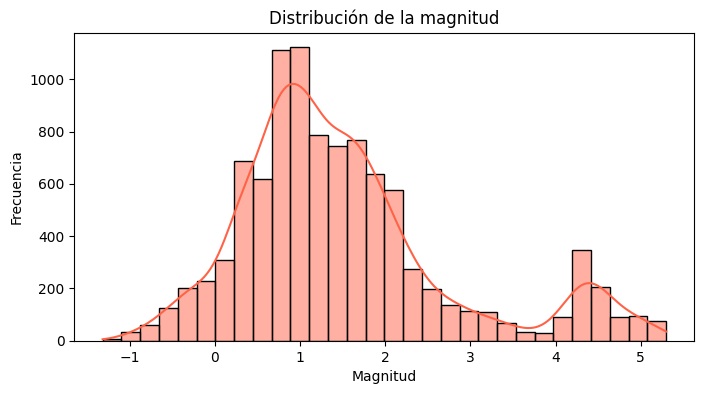

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de magnitudes
plt.figure(figsize=(8, 4))
sns.histplot(terremotos['mag'], bins=30, kde=True, color='tomato')
plt.title("Distribución de la magnitud")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.show()


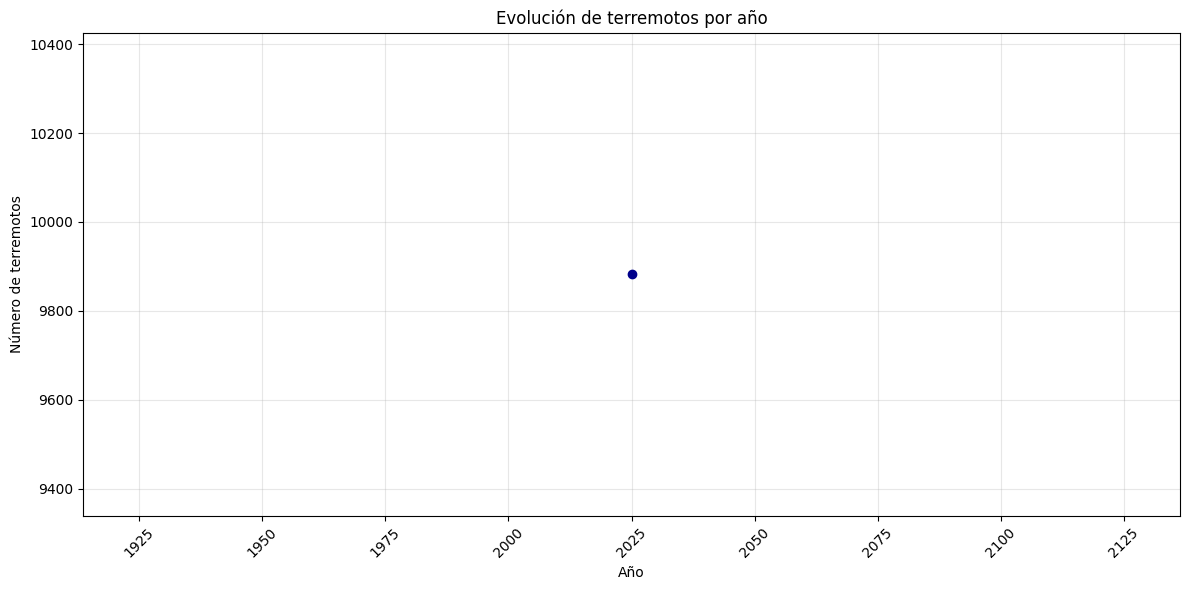

In [38]:
# Agrupar por año y contar
terremotos_por_año = terremotos.groupby('year').size().reset_index(name='count')

# Crear gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(terremotos_por_año['year'], terremotos_por_año['count'], 
         marker='o', linewidth=2, color='darkblue')
plt.title("Evolución de terremotos por año")
plt.xlabel("Año")
plt.ylabel("Número de terremotos")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
import os

file_path = r'C:\Users\satin\OneDrive\Documentos\GitHub\TERREMOTOS\terremotos_limpio.csv'

if os.path.exists(file_path):
    print("El archivo limpio se ha creado correctamente.")
else:
    print("El archivo limpio no se ha encontrado.")


El archivo limpio no se ha encontrado.


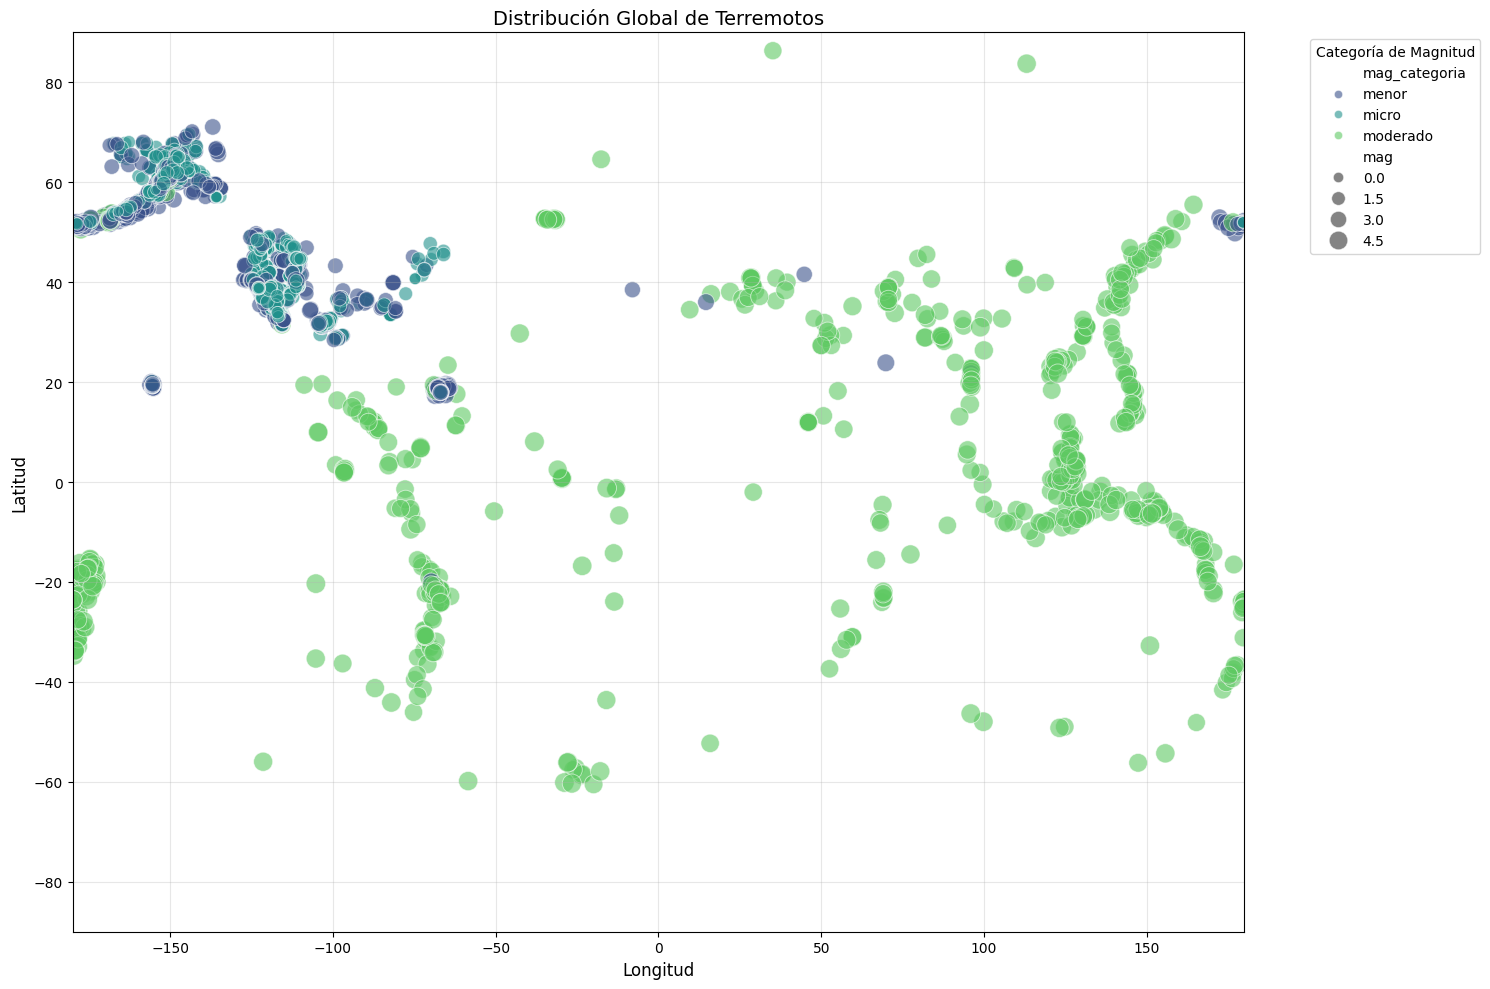

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=terremotos, 
                x='longitude', 
                y='latitude', 
                hue='mag_categoria',
                size='mag',
                sizes=(20, 200),
                alpha=0.6,
                palette='viridis')

plt.title("Distribución Global de Terremotos", fontsize=14)
plt.xlabel("Longitud", fontsize=12)
plt.ylabel("Latitud", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Categoría de Magnitud', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los límites del mapa
plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.tight_layout()
plt.show()


In [46]:
# Magnitud por tipo de terremoto
terremotos.groupby('type')['mag'].mean().sort_values(ascending=False)

# Magnitud por red
terremotos.groupby('net')['mag'].mean().sort_values(ascending=False)


C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1906387823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terremotos.groupby('type')['mag'].mean().sort_values(ascending=False)
C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1906387823.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terremotos.groupby('net')['mag'].mean().sort_values(ascending=False)


net
us    4.206031
pr    2.769516
hv    2.143440
se    1.998667
nm    1.895217
ak    1.852861
tx    1.749222
ok    1.287258
uu    1.194507
nn    1.120530
ci    1.104435
nc    0.921777
uw    0.887986
mb    0.586180
av    0.140861
Name: mag, dtype: float64

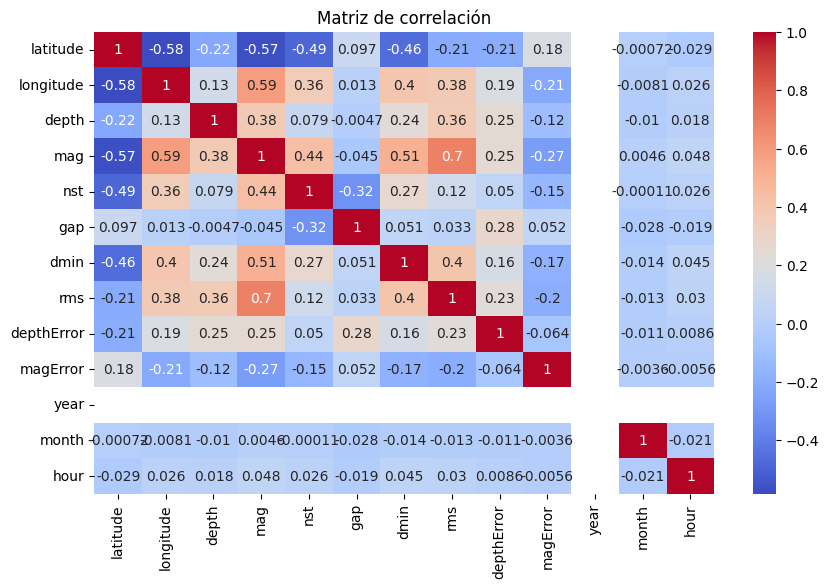

In [47]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(terremotos.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


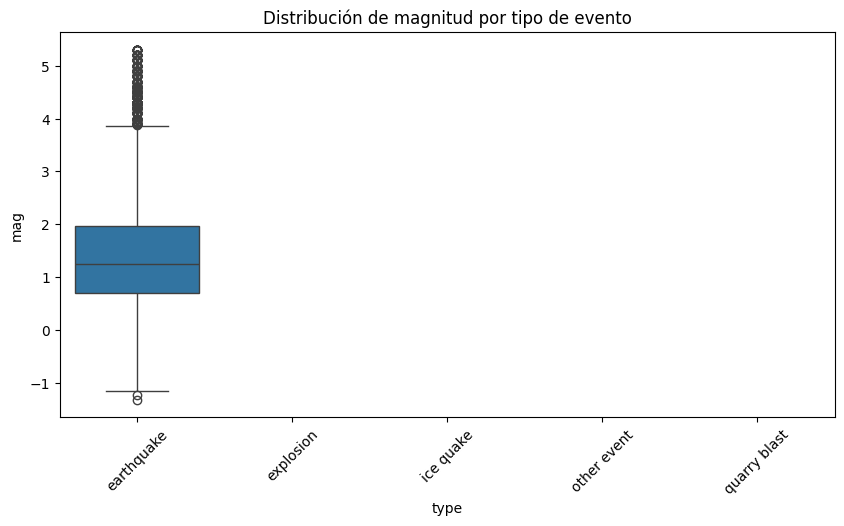

In [48]:
# Magnitud por tipo de evento
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='mag', data=terremotos)
plt.title("Distribución de magnitud por tipo de evento")
plt.xticks(rotation=45)
plt.show()


C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1488184751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=terremotos, palette='Blues')


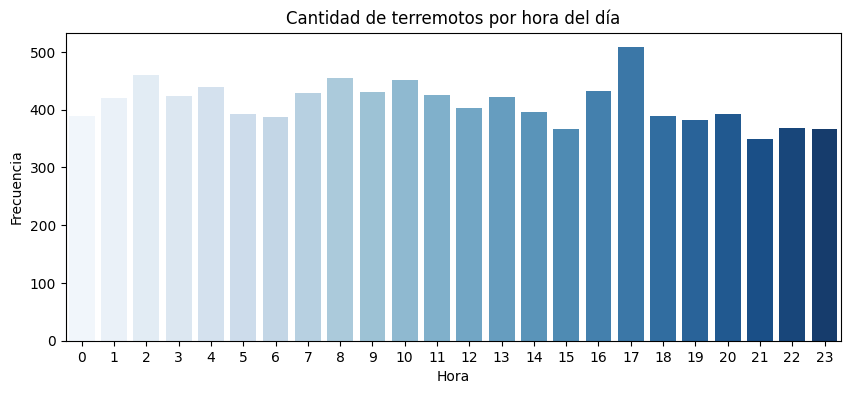

In [49]:
terremotos['hour'] = terremotos['time'].dt.hour
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=terremotos, palette='Blues')
plt.title("Cantidad de terremotos por hora del día")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.show()


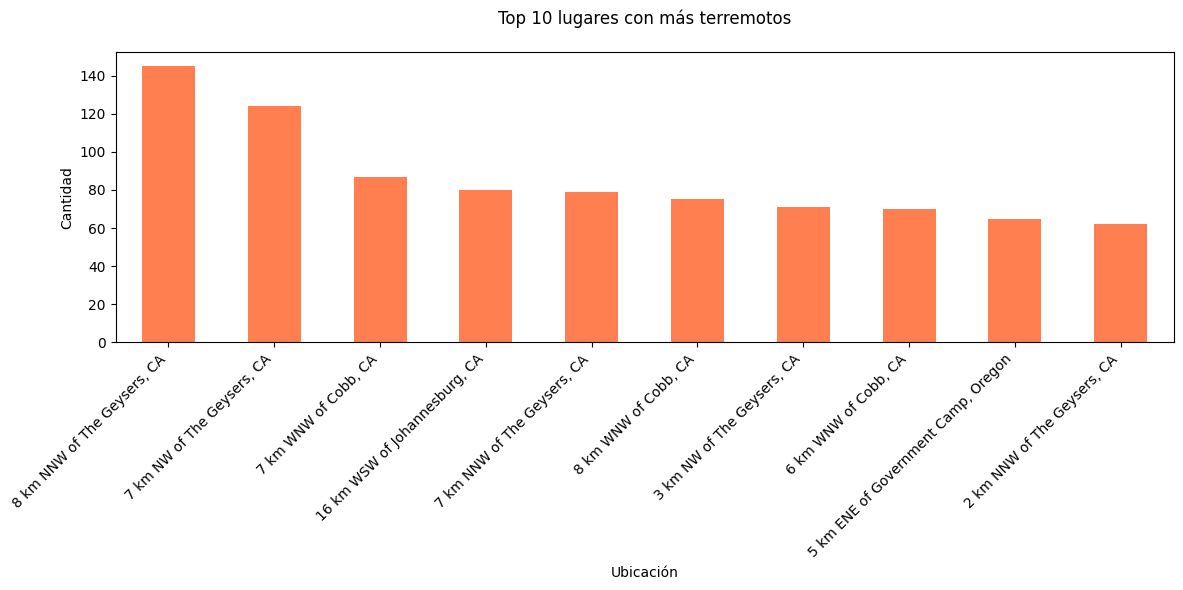

In [51]:
plt.figure(figsize=(12, 6))
top_places.plot(kind='bar', color='coral')
plt.title("Top 10 lugares con más terremotos", pad=20)
plt.ylabel("Cantidad")
plt.xlabel("Ubicación")

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=45, ha='right')

# Ajustar los márgenes
plt.tight_layout()

plt.show()


C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1281991248.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  terremotos['fecha'] = terremotos['time'].dt.to_period('M')


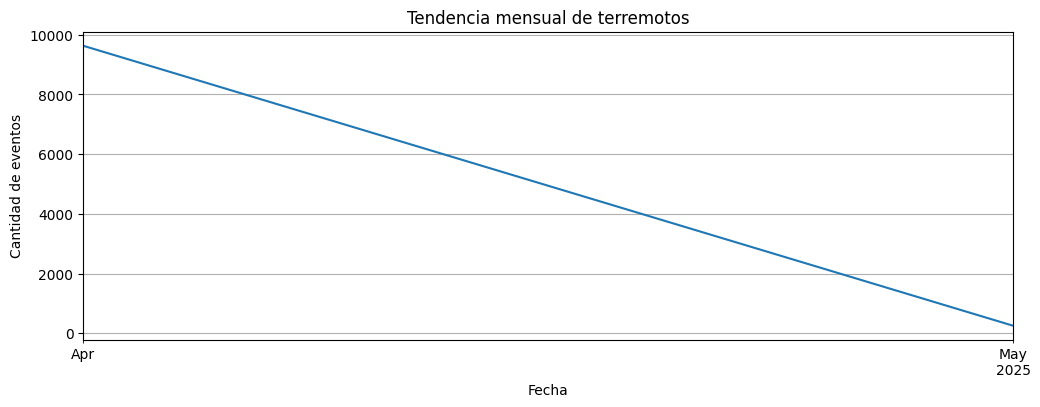

In [52]:
# Contar terremotos por mes
terremotos['fecha'] = terremotos['time'].dt.to_period('M')
serie_mensual = terremotos.groupby('fecha').size()

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
serie_mensual.plot()
plt.title("Tendencia mensual de terremotos")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de eventos")
plt.grid(True)
plt.show()


In [53]:
# Estadísticas por año
resumen_anual = terremotos.groupby('year').agg({
    'mag': ['count', 'mean', 'max'],
    'depth': ['mean', 'max']
})

print(resumen_anual)


       mag                     depth         
     count      mean  max       mean      max
year                                         
2025  9882  1.500399  5.3  20.553658  642.872


In [71]:
stats_by_type = terremotos.groupby('type').agg({
    'mag': ['count', 'mean', 'median', 'min', 'max', 'std'],
    'depth': ['mean', 'median', 'min', 'max', 'std']
})

print("\nEstadísticas por tipo de evento:")
stats_by_type


Estadísticas por tipo de evento:


C:\Users\satin\AppData\Local\Temp\ipykernel_13620\185779460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_type = terremotos.groupby('type').agg({


mag                                            depth          \
             count      mean median   min  max       std       mean  median   
type                                                                          
earthquake    9882  1.500399   1.24 -1.32  5.3  1.260342  20.553658  7.5354   
explosion        0       NaN    NaN   NaN  NaN       NaN        NaN     NaN   
ice quake        0       NaN    NaN   NaN  NaN       NaN        NaN     NaN   
other event      0       NaN    NaN   NaN  NaN       NaN        NaN     NaN   
quarry blast     0       NaN    NaN   NaN  NaN       NaN        NaN     NaN   

                                        
               min      max        std  
type                                    
earthquake   -3.41  642.872  50.424708  
explosion      NaN      NaN        NaN  
ice quake      NaN      NaN        NaN  
other event    NaN      NaN        NaN  
quarry blast   NaN      NaN        NaN

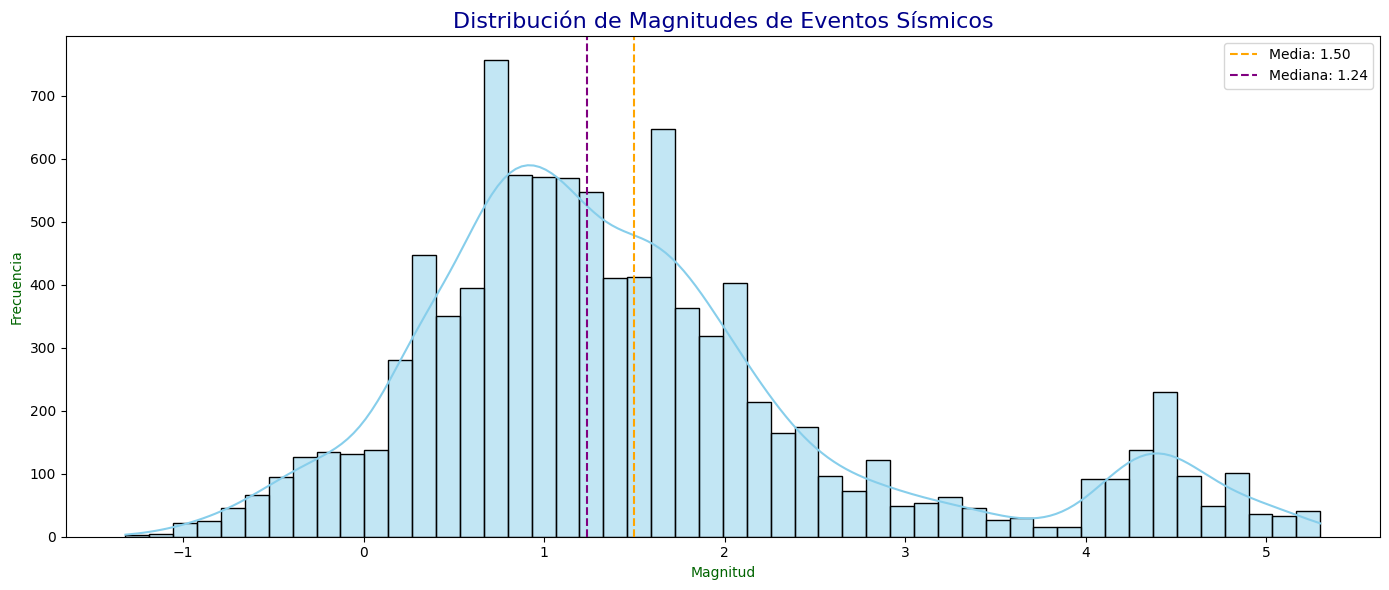

In [74]:
# Crear figura para visualizar distribución de magnitudes
plt.figure(figsize=(14, 6))
ax = sns.histplot(terremotos['mag'], bins=50, kde=True, color='skyblue')  # Cambiar color del histograma
plt.title('Distribución de Magnitudes de Eventos Sísmicos', fontsize=16, color='darkblue')  # Cambiar color del título
plt.xlabel('Magnitud', color='darkgreen')  # Cambiar color de la etiqueta del eje X
plt.ylabel('Frecuencia', color='darkgreen')  # Cambiar color de la etiqueta del eje Y
plt.axvline(terremotos['mag'].mean(), color='orange', linestyle='--', label=f'Media: {terremotos["mag"].mean():.2f}')  # Cambiar color de la línea de la media
plt.axvline(terremotos['mag'].median(), color='purple', linestyle='--', label=f'Mediana: {terremotos["mag"].median():.2f}')  # Cambiar color de la línea de la mediana
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_magnitudes.png', dpi=300, bbox_inches='tight')

C:\Users\satin\AppData\Local\Temp\ipykernel_13620\1398639798.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mag_categoria', data=terremotos, order=['micro', 'menor', 'moderado', 'fuerte', 'grande'], palette='coolwarm')


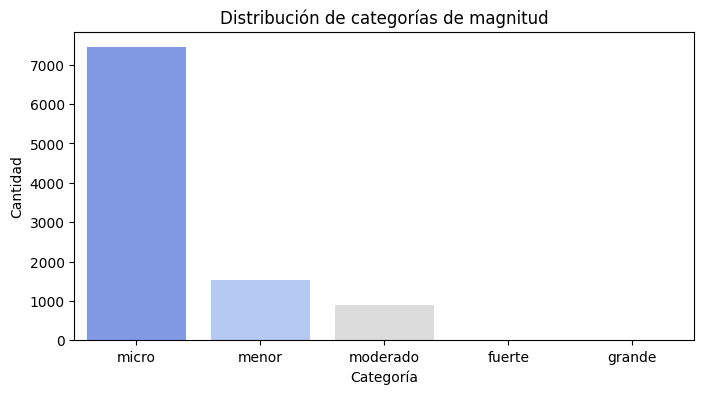

In [59]:
# Clasificar magnitud
def clasificar_magnitud(mag):
    if mag < 2.0:
        return 'micro'
    elif mag < 4.0:
        return 'menor'
    elif mag < 6.0:
        return 'moderado'
    elif mag < 7.0:
        return 'fuerte'
    else:
        return 'grande'

terremotos['mag_categoria'] = terremotos['mag'].apply(clasificar_magnitud)

# Visualizar distribución
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='mag_categoria', data=terremotos, order=['micro', 'menor', 'moderado', 'fuerte', 'grande'], palette='coolwarm')
plt.title("Distribución de categorías de magnitud")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.show()


In [80]:
terremotos = terremotos.dropna(subset=['longitude', 'latitude'])


In [82]:
from shapely.geometry import Point
import geopandas as gpd

# Crear geometría
geometry = [Point(xy) for xy in zip(terremotos['longitude'], terremotos['latitude'])]

# Crear GeoDataFrame con sistema de referencia geográfico (CRS) estándar WGS84
geo_df = gpd.GeoDataFrame(terremotos, geometry=geometry, crs="EPSG:4326")



In [87]:
pip install geodatasets



   ---------------------------------------- 0/2 [pooch]
   -------------------- ------------------- 1/2 [geodatasets]
   ---------------------------------------- 2/2 [geodatasets]

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import geodatasets

In [3]:
mundo = gpd.read_file(geodatasets.get_path('naturalearth.land'))


In [10]:
import pandas as pd

# Use raw string (r prefix) for Windows file paths to handle backslashes correctly
terremotos = pd.read_csv(r'C:\Users\satin\OneDrive\Documentos\GitHub\TERREMOTOS\all_month 1.csv')

# Verifica las primeras filas del DataFrame
print(terremotos.head())


                               time   latitude   longitude    depth   mag  \
0  2025-04-02 02:55:21.360000+00:00  18.911000  -65.151000  44.2300  3.39   
1  2025-04-02 03:06:07.531000+00:00  55.335200 -160.375100   5.9640  2.80   
2  2025-04-02 03:13:45.209000+00:00  61.291500 -147.753400  17.5000  2.00   
3  2025-04-02 03:38:09.956000+00:00  29.001000  -98.015000   5.7373  2.10   
4  2025-04-02 03:39:39.270000+00:00  51.926833  179.552667   6.8700  1.57   

  magType   nst    gap     dmin   rms  ...  magError    status locationSource  \
0      md  16.0  244.0  0.58540  0.26  ...  0.102739  reviewed             pr   
1      ml  26.0  207.0  0.06000  0.63  ...  0.081000  reviewed             us   
2      ml   0.0   94.0  0.05214  0.66  ...  0.177142  reviewed             ak   
3      ml  23.0   81.0  0.00000  0.20  ...  0.100000  reviewed             tx   
4      ml   6.0  148.0  0.02751  0.26  ...  0.188070  reviewed             av   

  magSource  ubicacion_relativa                   

In [11]:
print(terremotos.columns)  # Para ver los nombres de las columnas


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'updated', 'place', 'type', 'depthError',
       'magError', 'status', 'locationSource', 'magSource',
       'ubicacion_relativa', 'ciudad', 'year', 'month', 'hour',
       'mag_categoria'],
      dtype='object')


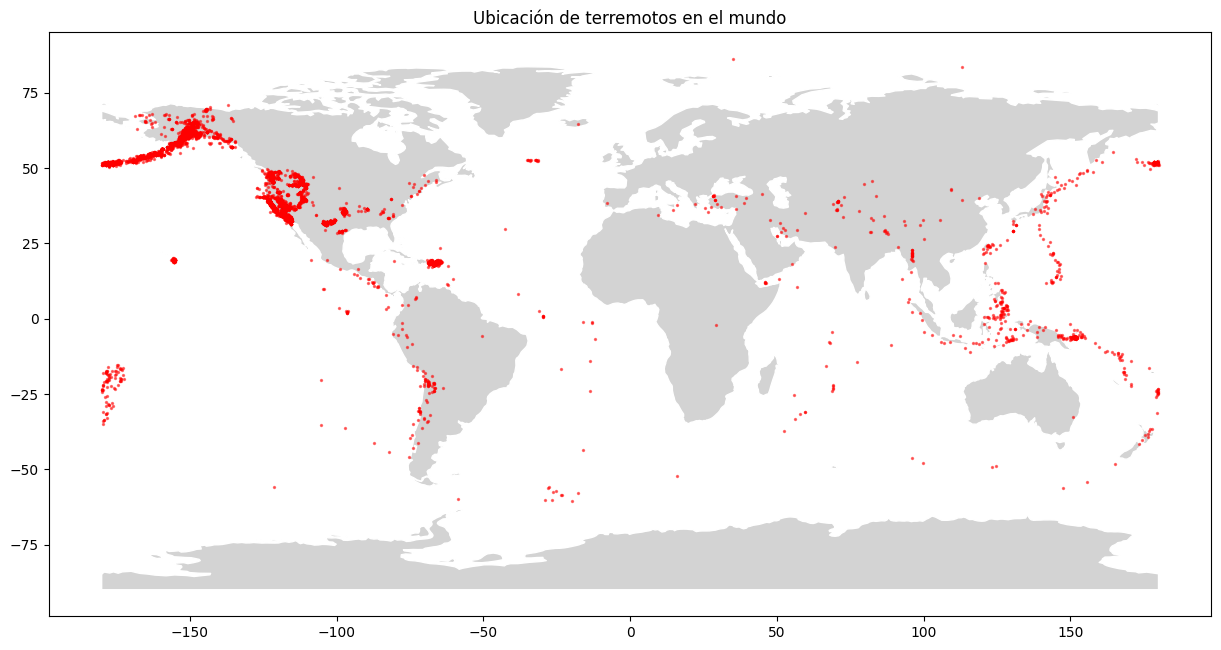

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

try:
    # Verifica que las columnas 'longitude' y 'latitude' existen
    if 'longitude' in terremotos.columns and 'latitude' in terremotos.columns:
        # Crear GeoDataFrame para los terremotos
        geometry = [Point(xy) for xy in zip(terremotos['longitude'], terremotos['latitude'])]
        geo_df = gpd.GeoDataFrame(terremotos, geometry=geometry, crs="EPSG:4326")

        # Crear el gráfico
        fig, ax = plt.subplots(figsize=(15, 8))
        mundo.plot(ax=ax, color='lightgrey', edgecolor='white')
        geo_df.plot(ax=ax, markersize=2, color='red', alpha=0.5)
        plt.title("Ubicación de terremotos en el mundo")
        plt.show()
    else:
        print("Error: El DataFrame 'terremotos' no contiene las columnas 'longitude' y 'latitude'.")
except NameError:
    print("Error: Asegúrate de que el DataFrame 'terremotos' esté correctamente cargado.")
    print("Intenta ejecutar la celda que carga 'terremotos' desde el archivo CSV primero.")


In [79]:
print(terremotos[['longitude', 'latitude']].head())


               longitude   latitude
id                                 
pr71478163    -65.151000  18.911000
us7000puki   -160.375100  55.335200
ak025487b3xk -147.753400  61.291500
tx2025gknz    -98.015000  29.001000
av93558206    179.552667  51.926833


In [15]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Crear el mapa base centrado en el centro del mundo
m = folium.Map(location=[0, 0], zoom_start=2, control_scale=True)

# Agrupar marcadores
marker_cluster = MarkerCluster().add_to(m)

# Agregar los marcadores de los terremotos (limitamos a los primeros 1000 para mejor rendimiento)
for idx, row in terremotos.head(1000).iterrows():
    # Añadir color según la magnitud
    if row['mag'] < 2:
        color = 'green'
    elif row['mag'] < 4:
        color = 'orange'
    else:
        color = 'red'
        
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Magnitud: {row['mag']}<br>Tiempo: {row['time']}<br>Profundidad: {row['depth']}km",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Guardar y mostrar el mapa
m.save("mapa_interactivo.html")
display(m)


In [18]:
from folium.plugins import HeatMap
from IPython.display import display

# Crear el mapa base
m = folium.Map(location=[0, 0], zoom_start=2)

# Preparar los datos para el mapa de calor incluyendo la magnitud como peso
heat_data = [[row['latitude'], row['longitude'], row['mag']] for idx, row in terremotos.iterrows()]

# Agregar el mapa de calor con parámetros ajustados
HeatMap(heat_data, 
    min_opacity=0.2,
    max_val=max(row[2] for row in heat_data),
    radius=15,
    blur=10,
    gradient={'0.4': 'blue', '0.6': 'cyan', '0.7': 'lime', '0.8': 'yellow', '1.0': 'red'}
).add_to(m)

# Mostrar el mapa
display(m)

# Guardar el mapa
m.save("mapa_calor.html")


C:\Users\satin\AppData\Local\Temp\ipykernel_25720\2750947939.py:11: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data,


In [ ]:
from IPython.display import display

# Crear el mapa base
m = folium.Map(location=[0, 0], zoom_start=2)

# Función para determinar el color según la magnitud
def get_color(magnitude):
    if magnitude >= 7:
        return 'red'
    elif magnitude >= 5:
        return 'orange'
    else:
        return 'green'

# Agregar los marcadores con colores basados en la magnitud
for idx, row in terremotos.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=get_color(row['mag']),
        fill=True,
        fill_color=get_color(row['mag']),
        fill_opacity=0.6,
        popup=f"Magnitude: {row['mag']}, Time: {row['time']}"
    ).add_to(m)

# Guardar el mapa
m.save("mapa_magnitud.html")

# Mostrar el mapa
display(m)
